<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/random_forest_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> PROYECTO DE MACHINE LEARNING SUPERVISADO </h1>


<h3>Clasificando dígitos escritos a mano</h3>

El grupo de datos se los obtiene de: http://yann.lecun.com/exdb/mnist/.

MNIST - Modified National Institute of Standards and Technology

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


<ul> train-images-idx3-ubyte.gz:  training set images </ul>
<ul> train-labels-idx1-ubyte.gz:  training set labels </ul>
<ul> t10k-images-idx3-ubyte.gz:   test set images </ul>
<ul> t10k-labels-idx1-ubyte.gz:   test set labels </ul>





Los datos en formato .gz descomprimirlos dentro de un folder **MNIST_data**

$ gzip *ubyte.gz -d


En nuestro consola de trabajo instalamos el paquete mnist que viene con python:

**$ pip install python-mnist**


Una reserva de esta info, podemos encontrar estos set de datos en formato .csv en kaggle: https://www.kaggle.com/c/digit-recognizer/data 


In [1]:
!pip install python-mnist

In [2]:
# DATOS

# importar
from mnist import MNIST


#importar el dataset
mndata = MNIST('/content/MNIST_data')

In [3]:
# DATOS de entrenamiento (features -> images y labels -> labels)
# (features -> datos y labels -> etiquetas)
datos, labels = mndata.load_training()

In [4]:
# VISUALIZACION 

# librerías
%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
# Trabajo con ARRAYs

# import NUMPY
import numpy as np

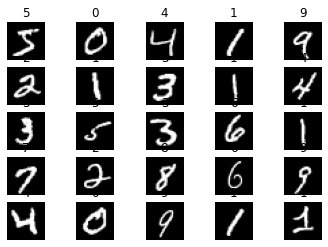

In [6]:
# matplotlib escala de grises
plt.gray()


for i in range(25):
    plt.subplot(5,5,i+1)
    
    d_image = datos[i]
    d_image = np.array(d_image, dtype='float')
    
    pixels = d_image.reshape((28, 28))
    
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [7]:
# sk-learn para dividir todo el set de entrenamiento en: entrenamiento y validación
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

In [8]:
# DATOS 
# todos los datos de training... deben ser divididos

#  -Datos de Entremamiento 70%  (features, labels)
#  -Datos de Testing  30%   (features y labels)

# sklearn.model_selection.train_test_split(*arrays, **options)

# train_data, test_data, train_labels, test_labels
train_data, test_data, train_labels, test_labels = train_test_split(datos, labels, test_size=0.3, random_state=42)

<h3>Modelos y Entrenamiento</h3>

In [9]:
# SKLEARN
# que es como se usa

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

Los datos estan listo para ser entrenados en nuestro clasificador.

Vamos a seleccionar entre las diferentes opciones de Machine Learning supervisado:

* Arbol de decisiones "Decision Tree"
* Random Forest

In [10]:
# SKLEARN
# modelos de ML


# decision tree
from sklearn.tree import DecisionTreeClassifier

class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)[source]

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [11]:
# creamos el clasificador

clf_dt = DecisionTreeClassifier()

In [12]:
# entrenar (fit)

clf_dt.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h3> Evaluación </h3>

Utilizando la SKLEARN 
Matriz de Confusión

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [13]:
# importar librería para las metricas de evaluación
from sklearn.metrics import confusion_matrix

In [14]:
# definimos una funcion para evaluar el clasificador
def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    
    MC = confusion_matrix(test_labels, pred)
    return MC

In [15]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

# evaluar clasificador: ARBOL DE DECISIONES, datos de evaluación: test_data, test_labels
MC = evaluate_classifier(clf_dt, test_data, test_labels)

In [16]:
# imprimir la matriz de confusión
print(MC)

[[1620    2   32   19   16   37   32   12   25   10]
 [   2 1905   20   14    5    8   10   13   14    3]
 [  14   27 1454   59   24   28   50   37   46   20]
 [  12   21   50 1505   15   81   17   29   78   38]
 [   6    5   20   11 1484   29   25   29   24   93]
 [  33   15   12   80   25 1323   45    7   69   44]
 [  25    6   31   13   29   41 1599    3   33    7]
 [   8   10   44   14   26   16    5 1762   14   38]
 [  18   27   66   52   53   69   27   17 1335   66]
 [  16   15   25   30   86   41    8   61   48 1433]]


In [17]:
# calcular el puntaje con los valores de la matriz de confusión
score = MC.diagonal().sum()*100./MC.sum()

In [18]:
# imprimir valor del puntaje (score)
print(score)

85.66666666666667


<h3>Otros modelos</h3>

In [19]:
# SKLEARN
# modelos de ML

# importar RandomForest de sk-learn
from sklearn.ensemble import RandomForestClassifier

In [20]:
# RandomForest

# n_estimators numero de árboles que queremos en la red
# min_samples_split número mínimo de filas que utilizaremos
# min_samples_leaf número mínimo de samples que tenemos al final del árbol

# clf_rd = RandomForestClassifier(n_estimators=<numero de arboles>)
# estimamos con 150 árboles
clf_rd = RandomForestClassifier(n_estimators=150, min_samples_split=2)

In [21]:
# entrenar (fit)
clf_rd.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

# evaluar RANDOM FOREST con el metodo de evaluador clasificador
MC = evaluate_classifier(clf_rd, test_data, test_labels)

In [23]:
# imprimir valor de la matriz de confusión
print(MC)

[[1775    0    2    3    3    5    8    0    8    1]
 [   0 1964   13    6    4    1    1    3    1    1]
 [   4    5 1713    6    5    1    3   14    7    1]
 [   4    1   33 1739    1   20    1   16   20   11]
 [   3    1    1    0 1683    0    4    4    2   28]
 [   8    2    3   15    2 1588   12    2   14    7]
 [   5    1    2    0    4   12 1759    0    4    0]
 [   1   10   24    0    6    0    0 1878    5   13]
 [   1    7   17   10   13   12    6    1 1653   10]
 [   9    3    6   14   26    6    2   13    5 1679]]


In [24]:
# calcular el puntaje (score)
score = MC.diagonal().sum()*100./MC.sum()

In [25]:
# imprimir el puntaje (score)
print(score)

96.83888888888889


<h3>DATOS FINALES DE PRUEBA</h3>

In [26]:
# vamos a probar los datos de prueba

# Cargamos los datos de evaluacion
eval_data, eval_labels = mndata.load_testing()

In [27]:
# Aplicamos el clasificador a todo el dataset de Evaluacion y obtenemos el Accuracy

predicted_data = clf_rd.predict(eval_data)

In [28]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

# evaluar RANDOM FOREST con el metodo de evaluador clasificador
MC_clf_rd = evaluate_classifier(clf_rd, eval_data, np.array(eval_labels))

In [29]:
# imprimir valor de la matriz de confusión
print(MC_clf_rd)

[[ 970    0    1    0    0    2    2    1    4    0]
 [   0 1124    2    3    0    2    2    1    1    0]
 [   6    0 1000    7    1    0    4    8    6    0]
 [   0    0   14  965    0   10    0    9    9    3]
 [   1    0    2    0  952    0    4    0    2   21]
 [   5    0    0   11    4  856    7    2    4    3]
 [   7    3    0    0    3    5  935    0    5    0]
 [   2    4   19    0    3    0    0  988    4    8]
 [   3    0    4   11    7    7    4    4  925    9]
 [   7    6    2    9   10    3    1    3    5  963]]


In [30]:
# calcular el puntaje (score)
score_clf_rd = MC_clf_rd.diagonal().sum()*100./MC_clf_rd.sum()

In [31]:
# imprimir el puntaje (score)
print(score_clf_rd)

96.78


<h2>Otras pruebas</h2>

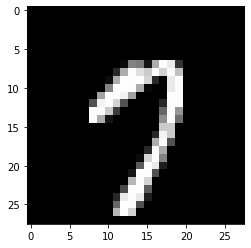

In [32]:
# Elegimos al azar una imagen del dataset de prueba. Index 8y lo graficamos para identificar q digito es

# digito seleccionado
d = test_data[7]

d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [33]:
# Aplicamos el clasificador a este index para ver el resultado
#digito seleccionado
print(clf_dt.predict( [test_data[7]]))

[7]
